<a href="https://colab.research.google.com/github/helinatefera/10xWeek0/blob/task-1/notebooks/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [36]:
data = pd.read_csv('data.csv')

In [37]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [38]:
len(data)

22394

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22394 entries, 0 to 22393
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 22046 non-null  float64
 1   Start                                     22393 non-null  object 
 2   Start ms                                  22393 non-null  float64
 3   End                                       22393 non-null  object 
 4   End ms                                    22393 non-null  float64
 5   Dur. (ms)                                 22393 non-null  float64
 6   IMSI                                      22234 non-null  float64
 7   MSISDN/Number                             22080 non-null  float64
 8   IMEI                                      22234 non-null  float64
 9   Last Location Name                        21970 non-null  object 
 10  Avg RTT DL (ms)                   

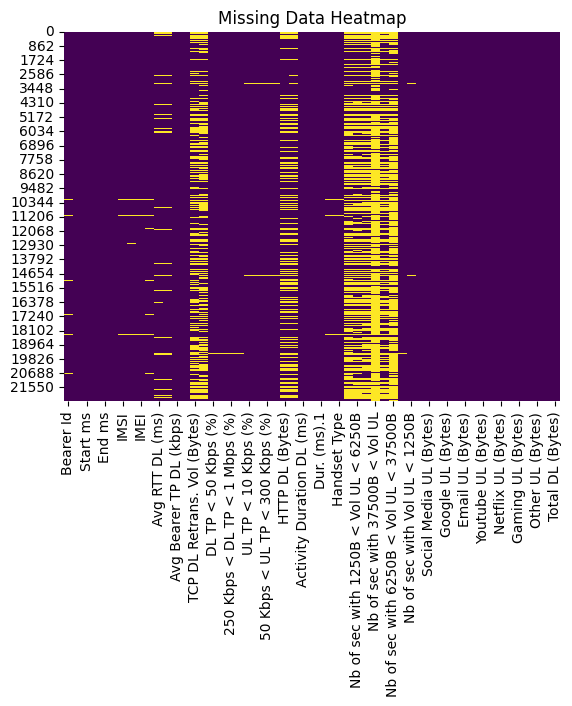

In [40]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [52]:
# Count of missing values for each column
missing_values = data.isnull().sum()

# Percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Get the columns to drop (those with >70% missing values)
columns_to_drop = missing_percentage[missing_percentage > 70].index

# Drop the columns in one go
data = data.drop(columns=columns_to_drop)

In [53]:
len(data.columns)

54

## Top 10 handsets used by the customers.


In [49]:
# Group by 'Handset Manufacturer' and count occurrences
top_handsets = data['Handset Manufacturer'].value_counts().head(10)

In [46]:
top_handsets

,count
Handset Manufacturer,
Apple,10207
Samsung,4856
Huawei,4335
undefined,996
Sony Mobile Communications Ab,329
Wiko Global Sasu,210
Xiaomi Communications Co Ltd,163
Oneplus Technology (Shenzhen) Co Ltd,124
Asustek,122


**Results Interpretation:**
The result should show that Apple is the most frequently used handset manufacturer, followed by Samsung and Huawei. The others, like Xiaomi, Oneplus, and Lenovo, are relatively less common.

Let me know if you'd like to explore the data further!

In [55]:
# Top handsets Type
top_handsets = data['Handset Type'].value_counts().head(10)
top_handsets

,count
Handset Type,
Huawei B528S-23A,2133
Apple iPhone 6 (A1586),1701
Apple iPhone 6S (A1688),1347
Apple iPhone 7 (A1778),1319
undefined,996
Apple iPhone Se (A1723),843
Apple iPhone 8 (A1905),824
Apple iPhone X (A1901),646
Apple iPhone Xr (A2105),541


In [58]:
top_manufacturers = ['Apple', 'Samsung', 'Huawei']
filtered_data = data[data['Handset Manufacturer'].isin(top_manufacturers)]
top_5_handsets_per_manufacturer = {}
for manufacturer in top_manufacturers:
    manufacturer_data = filtered_data[filtered_data['Handset Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"{manufacturer}:")
    print(handsets)


Apple:
Handset Type
Apple iPhone 6 (A1586)     1701
Apple iPhone 6S (A1688)    1347
Apple iPhone 7 (A1778)     1319
Apple iPhone Se (A1723)     843
Apple iPhone 8 (A1905)      824
Name: count, dtype: int64
Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)         494
Samsung Galaxy S7 (Sm-G930X)         373
Samsung Galaxy A5 Sm-A520F           323
Samsung Galaxy S7 Edge (Sm-G935X)    272
Samsung Galaxy J3 (Sm-J330)          270
Name: count, dtype: int64
Huawei:
Handset Type
Huawei B528S-23A                  2133
Huawei P20 Lite Huawei Nova 3E     218
Huawei E5180                       216
Huawei P8 Lite                     178
Huawei P20                         164
Name: count, dtype: int64


### **Interpretation**:
- **Apple**: The dominance of older iPhone models (iPhone 6, 6S, and 7) suggests a loyal customer base, potentially focused on cost-effective upgrades or replacement rather than switching to newer models. The iPhone Xr and X models indicate some interest in newer releases but at a smaller scale.
  
- **Samsung**: The top handsets are a mix of high-end (Galaxy S8, S7) and mid-range models (A5, J3), showing Samsung's broad appeal across different customer segments. However, the numbers are lower compared to Apple, indicating potential room for more market penetration.

- **Huawei**: The Huawei B528S-23A handset dominates, highlighting strong brand presence in specific product lines. However, the rest of their models (P20, Y6) show limited customer engagement, which could signal a need for better-targeted campaigns.

### **Recommendations**:
- **Apple**: Target marketing efforts on providing attractive offers or trade-in deals for older iPhone models (6, 6S, 7) to upgrade to the latest models, possibly with incentives or discounts.
  
- **Samsung**: Focus on promoting the Galaxy S series and A series models to cater to both premium and budget-conscious customers. More emphasis on product differentiation may help increase sales in emerging markets.

- **Huawei**: Leverage the popularity of the B528S-23A for targeted campaigns but consider improving visibility for other models like the P20 and Y6 through influencer partnerships and promotions to drive higher engagement.

# **Task one**

In [65]:
# Aggregating the data for each user
aggregated_data = data.groupby('IMSI').agg(
    number_of_sessions=('Bearer Id', 'nunique'),  # Count of unique xDR sessions per user
    total_session_duration_dl=('Activity Duration DL (ms)', 'sum'),  # Total download duration
    total_session_duration_ul=('Activity Duration UL (ms)', 'sum'),  # Total upload duration
    total_social_media_dl=('Social Media DL (Bytes)', 'sum'),
    total_social_media_ul=('Social Media UL (Bytes)', 'sum'),
    total_google_dl=('Google DL (Bytes)', 'sum'),
    total_google_ul=('Google UL (Bytes)', 'sum'),
    total_youtube_dl=('Youtube DL (Bytes)', 'sum'),
    total_youtube_ul=('Youtube UL (Bytes)', 'sum'),
    total_netflix_dl=('Netflix DL (Bytes)', 'sum'),
    total_netflix_ul=('Netflix UL (Bytes)', 'sum'),
    total_gaming_dl=('Gaming DL (Bytes)', 'sum'),
    total_gaming_ul=('Gaming UL (Bytes)', 'sum'),
    total_email_dl=('Email DL (Bytes)', 'sum'),
    total_email_ul=('Email UL (Bytes)', 'sum'),
    total_others_dl=('Other DL (Bytes)', 'sum'),
    total_others_ul=('Other UL (Bytes)', 'sum')
).reset_index()


In [66]:
aggregated_data.head()

,IMSI,number_of_sessions,total_session_duration_dl,total_session_duration_ul,total_social_media_dl,total_social_media_ul,total_google_dl,total_google_ul,total_youtube_dl,total_youtube_ul,total_netflix_dl,total_netflix_ul,total_gaming_dl,total_gaming_ul,total_email_dl,total_email_ul,total_others_dl,total_others_ul
0,2.082001e+14,1,740.0,1052.0,996268.0,55565.0,9712501.0,3562840.0,14819244.0,4777564.0,15494900.0,18682284.0,6.214597e+08,11285996.0,3110793.0,328100.0,5.487023e+08,519932.0
1,2.082001e+14,2,692301.0,718974.0,1901280.0,91157.0,14707482.0,3718211.0,23540751.0,16183062.0,28574223.0,22852422.0,1.237717e+09,29148727.0,2358866.0,873353.0,6.555374e+08,17422326.0
2,2.082002e+14,1,53767.0,47158.0,1140106.0,30177.0,10449647.0,3457153.0,8448552.0,16417599.0,10549392.0,20292382.0,1.743606e+08,13117413.0,2238455.0,643834.0,6.287683e+08,14897654.0
3,2.082002e+14,1,1443125.0,404803.0,2964044.0,52989.0,7096184.0,2667120.0,21263080.0,1923718.0,19862420.0,2173329.0,2.431142e+07,6918930.0,1044625.0,861424.0,3.495839e+08,3065986.0
4,2.082003e+14,2,306078.0,320612.0,4008990.0,57684.0,18091345.0,3358331.0,32062537.0,20046309.0,30597167.0,14507596.0,5.075693e+08,24013895.0,2250987.0,372426.0,1.153546e+09,23181874.0


**Heavy Data Consumers:**

- **User 2** has the highest total session duration and the largest data consumption across all applications, especially in Google, YouTube, and Netflix.
-  **User 1** also stands out for their high data consumption in video apps like YouTube and Netflix.

In [72]:
statistics = data.describe()
print(statistics)

          Bearer Id      Start ms        End ms     Dur. (ms)          IMSI  \
count  2.204600e+04  22393.000000  22393.000000  2.239300e+04  2.223400e+04   
mean   1.019878e+19    498.749029    499.085027  4.239016e+04  2.082016e+14   
std    2.901880e+18    288.991194    286.711986  4.749628e+04  1.238229e+09   
min    7.200000e+00      0.000000      0.000000  8.937000e+03  2.082001e+14   
25%    7.277826e+18    249.000000    251.000000  2.027300e+04  2.082010e+14   
50%    1.268214e+19    498.000000    498.000000  2.959200e+04  2.082015e+14   
75%    1.304243e+19    750.000000    745.000000  5.368100e+04  2.082018e+14   
max    1.318654e+19    999.000000    999.000000  1.823652e+06  2.082099e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   2.208000e+04  2.223400e+04     20974.000000     20977.000000   
mean    3.367384e+10  4.704017e+13       166.202250        17.165896   
std     4.560739e+07  2.173754e+13       834.298814        86.219064   


# **Segmenting Users into Top Five Decile Classes Based on Total Duration**

In [76]:
# Calculate total duration for each user
data['total_duration'] = data.groupby('IMSI')['Dur. (ms).1'].transform('sum')

# Segment into deciles based on total duration
data['duration_decile'] = pd.qcut(data['total_duration'], 10, labels=False) + 1

# Compute total data usage (DL + UL) per user
data['total_data'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

# Aggregate total data by decile class
decile_data = data.groupby('duration_decile')['total_data'].sum().reset_index()

# Output the total data per decile class
print(decile_data)


   duration_decile    total_data
0              1.0  1.116896e+12
1              2.0  1.103059e+12
2              3.0  1.095730e+12
3              4.0  1.094169e+12
4              5.0  1.116213e+12
5              6.0  1.089590e+12
6              7.0  1.096910e+12
7              8.0  1.107411e+12
8              9.0  1.073483e+12
9             10.0  1.109074e+12


**Decile segmentation** allows you to categorize users based on their engagement level with the system. By computing the total data usage for each decile, you can identify high-usage segments (top deciles) that consume more resources, which could help in targeting high-value users for personalized services or improving network infrastructure.

In [78]:
summary_stats = data[['Dur. (ms).1', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']].describe()
summary_stats


,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Avg RTT DL (ms),Avg RTT UL (ms)
count,2.239300e+04,2.239300e+04,2.239300e+04,20974.000000,20977.000000
mean,4.239069e+07,4.539958e+08,4.096291e+07,166.202250,17.165896
std,4.749631e+07,2.444882e+08,1.122135e+07,834.298814,86.219064
min,8.937157e+06,7.114041e+06,4.469240e+06,6.000000,0.000000
25%,2.027393e+07,2.448883e+08,3.294448e+07,36.000000,3.000000
50%,2.959215e+07,4.547952e+08,4.092307e+07,50.000000,6.000000
75%,5.368117e+07,6.653188e+08,4.887295e+07,81.000000,14.000000
max,1.823653e+09,8.964337e+08,7.833131e+07,55811.000000,7120.000000


## Non-Graphical Univariate Analysis

In [80]:
dispersion_metrics = data[['Dur. (ms).1', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']].agg(['var', 'std'])
dispersion_metrics


,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Avg RTT DL (ms),Avg RTT UL (ms)
var,2.255899e+15,5.977448e+16,1.259187e+14,696054.511136,7433.726959
std,4.749631e+07,2.444882e+08,1.122135e+07,834.298814,86.219064


# Graphical Univariate Analysis

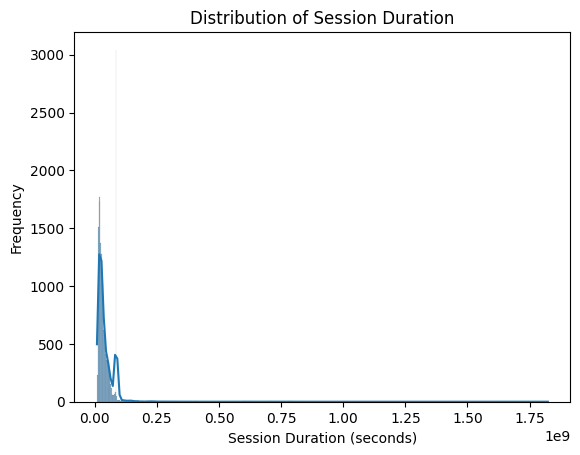

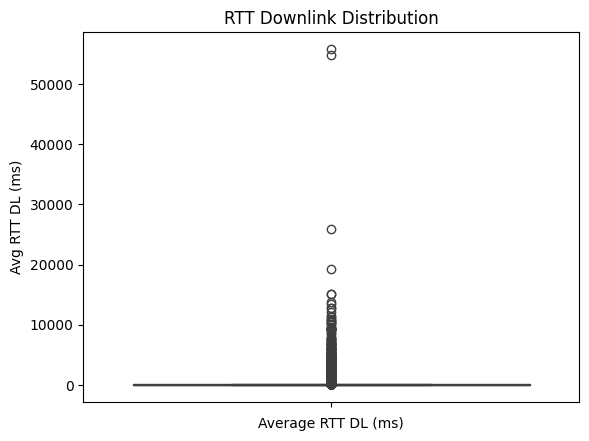

In [82]:
# Histogram for Total Duration
sns.histplot(data['Dur. (ms).1'], kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for RTT Downlink
sns.boxplot(data=data['Avg RTT DL (ms)'])
plt.title('RTT Downlink Distribution')
plt.xlabel('Average RTT DL (ms)')
plt.show()